# Model Training

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

#Modeling

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor




In [10]:
df=pd.read_csv('data/data.csv')

In [13]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [12]:
X=df.drop('math score',axis=1)
y=df['math score']

In [58]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [59]:
oh_encoder=OneHotEncoder()
scaler=StandardScaler()
processing=ColumnTransformer(
    [
        ('OneHotEncoder',oh_encoder,cat_features),
        ('StandardScaler',scaler,num_features)
    ]
)

In [60]:
X=processing.fit_transform(X)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
X_train.shape,X_test.shape

((700, 19), (300, 19))

### Evaluate Function of Models

In [ ]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    r2_square=r2_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    return rmse,mae,r2_square,mse

## Models

In [85]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'RandomForestRegressor':RandomForestRegressor(),
    'DTree Regressor':DecisionTreeRegressor(),
    'ADaboostingRegressor':AdaBoostRegressor(),
    'K neighbors Regressor':KNeighborsRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostingRegressor':CatBoostRegressor(),   
}
model_list=[]
r2_list=[]
for i in range (len(models)):
    ##Training 
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    ##prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ##Evaluation
    model_train_rmse,model_train_mae,model_train_r2,model_train_mse=evaluate_model(y_train,y_train_pred) 
    model_test_rmse,model_test_mae,model_test_r2,model_test_mse=evaluate_model(y_test,y_test_pred) 
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performating For Training Set')
    print('-Root Mean Squared Error {:.4f}'.format(model_train_rmse))
    print('-Mean Absolute Error {:.4f}'.format(model_train_mae))
    print('-R Squared Error {:.4f}'.format(model_train_r2))
    print('-Mean Squared Error {:.4f}'.format(model_train_mse))
    
    
    print('--------------------------------------------------------------')
    
    
    print('Model Performating For Testing Set')
    print('-Root Mean Squared Error {:.4f}'.format(model_test_rmse))
    print('-Mean Absolute Error {:.4f}'.format(model_test_mae))
    print('-R Squared Error {:.4f}'.format(model_test_r2))
    print('-Mean Squared Error {:.4f}'.format(model_test_mse))
    r2_list.append(model_test_r2)
    
    print('='*32)
    print('/n')
    

LinearRegression
Model Performating For Training Set
-Root Mean Squared Error 5.2483
-Mean Absolute Error 4.1985
-R Squared Error 0.8751
-Mean Squared Error 27.5447
--------------------------------------------------------------
Model Performating For Testing Set
-Root Mean Squared Error 5.5576
-Mean Absolute Error 4.4183
-R Squared Error 0.8759
-Mean Squared Error 30.8866
/n
Lasso
Model Performating For Training Set
-Root Mean Squared Error 6.5106
-Mean Absolute Error 5.1582
-R Squared Error 0.8078
-Mean Squared Error 42.3875
--------------------------------------------------------------
Model Performating For Testing Set
-Root Mean Squared Error 6.8705
-Mean Absolute Error 5.3929
-R Squared Error 0.8103
-Mean Squared Error 47.2041
/n
Ridge
Model Performating For Training Set
-Root Mean Squared Error 5.2487
-Mean Absolute Error 4.1977
-R Squared Error 0.8751
-Mean Squared Error 27.5484
--------------------------------------------------------------
Model Performating For Testing Set
-Ro

In [86]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','r2']).sort_values(by=['r2'],ascending=False)

,Model,r2
2,Ridge,0.875907
0,LinearRegression,0.875863
8,CatBoostingRegressor,0.852108
3,RandomForestRegressor,0.845963
5,ADaboostingRegressor,0.836963
7,XGBRegressor,0.811816
1,Lasso,0.810281
6,K neighbors Regressor,0.772020
4,DTree Regressor,0.728696


## Ridge

In [90]:
rdge=Ridge()
rdge.fit(X_train,y_train)
y_pred=rdge.predict(X_test)
accuracy=r2_score(y_test,y_pred)*100
print('{:.2f}'.format(accuracy))

87.59


Text(0, 0.5, 'Predicted Values')

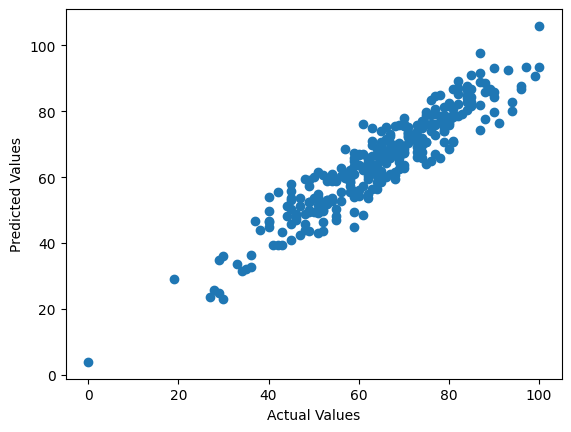

In [94]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')